In [ ]:
!pip install pandas-datareader

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [40]:
import pandas_datareader.data as web
import datetime  # Import datetime for current time

start = '2010-01-01'
end = datetime.date.today()  # Set 'end' to today's date

df = web.DataReader('GOOG', 'stooq', start, end)
df.head()


,Open,High,Low,Close,Volume
Date,,,,,
2024-04-09,157.350,159.890,156.6400,158.14,21538140
2024-04-08,154.015,156.655,153.9900,156.19,16629665
2024-04-05,151.680,154.840,151.0810,153.94,16297319
2024-04-04,155.080,156.180,151.8800,151.94,24184842
2024-04-03,154.920,156.550,154.1321,156.37,17266175


In [42]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2014-04-02,29.9995,30.2415,28.1095,28.3500,2933940
2014-04-01,27.9355,28.4225,27.9355,28.3580,158640
2014-03-31,28.3445,28.3500,27.8465,27.8485,215440
2014-03-28,28.0600,28.3215,27.9335,27.9995,820060
2014-03-27,28.4000,28.4000,27.6460,27.9230,261040


In [43]:
#  Date becomes column and are removable.
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2024-04-09,157.350,159.890,156.6400,158.14,21538140
1,2024-04-08,154.015,156.655,153.9900,156.19,16629665
2,2024-04-05,151.680,154.840,151.0810,153.94,16297319
3,2024-04-04,155.080,156.180,151.8800,151.94,24184842
4,2024-04-03,154.920,156.550,154.1321,156.37,17266175


## Information

This code deletes "Date" column from the dataset as they are not useful in our plotting.

In [44]:
df=df.drop(['Date'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,157.350,159.890,156.6400,158.14,21538140
1,154.015,156.655,153.9900,156.19,16629665
2,151.680,154.840,151.0810,153.94,16297319
3,155.080,156.180,151.8800,151.94,24184842
4,154.920,156.550,154.1321,156.37,17266175


- The project deals with the "close" column.
```py
plt.plot(df.Close)
```
- We can also create for ther columns also.
```py
plt.plot(df.Open)
```
```py
plt.plot(df.High)
```
```py
plt.plot(df.Low)
```
```py
plt.plot(df.Volume)
```

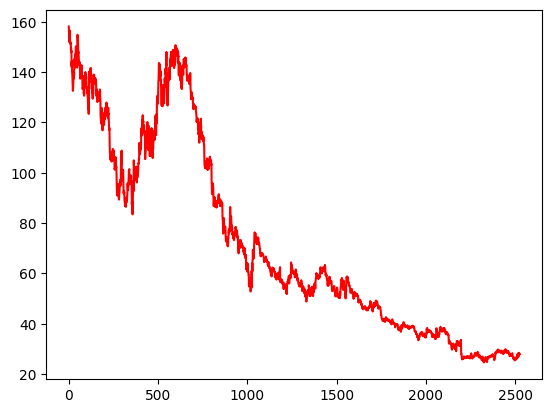

In [45]:
plt.plot(df.Close,color='r')

In [46]:
df

,Open,High,Low,Close,Volume
0,157.3500,159.8900,156.6400,158.1400,21538140
1,154.0150,156.6550,153.9900,156.1900,16629665
2,151.6800,154.8400,151.0810,153.9400,16297319
3,155.0800,156.1800,151.8800,151.9400,24184842
4,154.9200,156.5500,154.1321,156.3700,17266175
...,...,...,...,...,...
2521,29.9995,30.2415,28.1095,28.3500,2933940
2522,27.9355,28.4225,27.9355,28.3580,158640
2523,28.3445,28.3500,27.8465,27.8485,215440
2524,28.0600,28.3215,27.9335,27.9995,820060


In [47]:
# ma100 is created for finding the mean of the 100 values and displaying them.
# for that rolling() function is used.

ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2521    27.86985
2522    27.86215
2523    27.84895
2524    27.83670
2525    27.82250
Name: Close, Length: 2526, dtype: float64

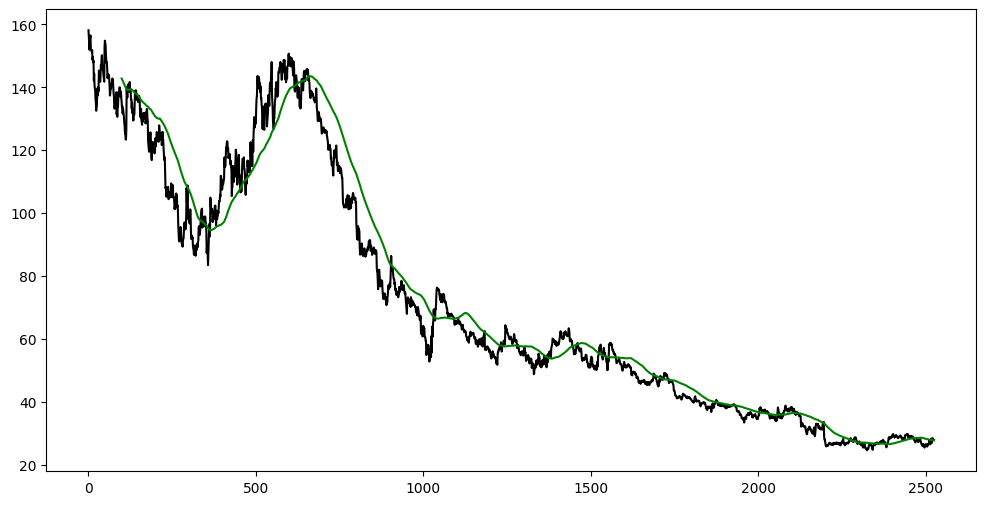

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

plt.plot(df.Close,'black')
plt.plot(ma100,'g') # this is the mean of 100 values

In [49]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2521    27.575317
2522    27.591660
2523    27.605685
2524    27.621637
2525    27.638115
Name: Close, Length: 2526, dtype: float64

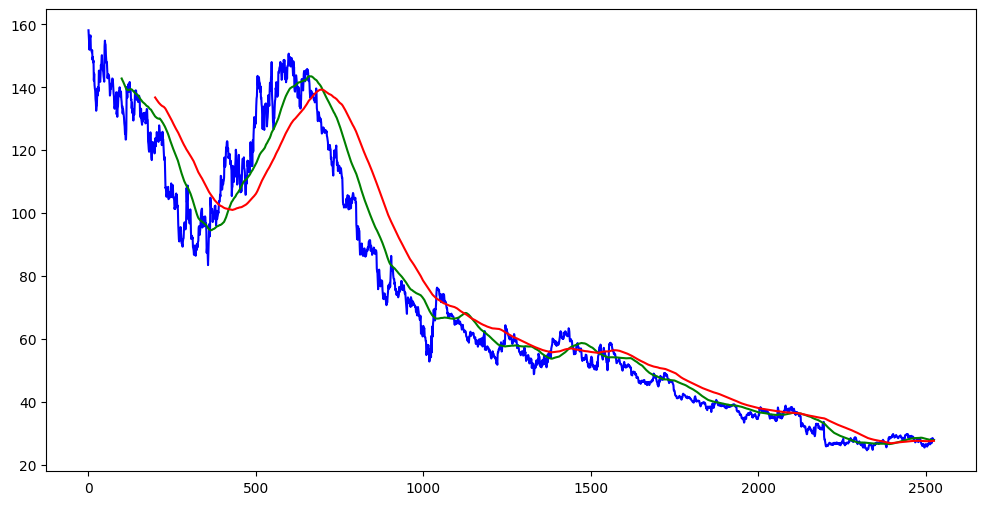

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

ma100=df.Close.rolling(100).mean()
ma100

plt.plot(df.Close,'b')
plt.plot(ma100,'g') # this is the mean of 100 values
plt.plot(ma200,'r') # this is the mean of 200 values

In [51]:
df.shape

(2526, 5)

### This the section

- We are splitting the data into 70% for training data **data_training** and for testing **data_testing** will be remaining 30% from the 70% value till last.

In [52]:
# splitting the data into training and testing
import pandas as pd
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print("Used data for training: ", data_training.shape)
print("Used data for testing: ", data_testing.shape)

Used data for training:  (1768, 1)
Used data for testing:  (758, 1)


In [53]:
data_training.head()

,Close
0,158.14
1,156.19
2,153.94
3,151.94
4,156.37


In [54]:
data_testing.head()

,Close
1768,41.5705
1769,41.0460
1770,40.9755
1771,40.7215
1772,40.8790


For LSTM , we need to scale the data into the range of [-1,1] and **Scaling is required.**

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[1.        ],
       [0.98332942],
       [0.96409412],
       ...,
       [0.00649725],
       [0.00267157],
       [0.00348372]])

- The above **data_training_array** needs to be divided into following **x_train** and **y_train** variable.


In [56]:
import numpy as np

# The data is dependant on the previous result. (ma100) and (ma200)
# So, to calculate the next day value we train the following array.
# 100 days are x_train and 101 day is y_train and it goes on changing.

x_train = []
y_train = []


for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])


x_train

# Now, converting x_train into numpy value, so that it can be provided to LSTM.
x_train,y_train = np.array(x_train), np.array(y_train)

# ML Model

In [18]:
!pip install tensorflow

In [57]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


In [20]:
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Orthogonal
import tensorflow as tf


model = tf.keras.Sequential()
model.add(LSTM(units=50,
               activation ='relu',
               return_sequences = True,
               input_shape=(x_train.shape[1],1),
                recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.2))


# Second Layer
model.add(LSTM(units=60,
               activation ='relu',
               return_sequences = True,
               recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.3))



model.add(LSTM(units=80,
               activation ='relu',
               return_sequences = True,
               recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.4))



model.add(LSTM(units=120,
               activation ='relu',
               recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.5))



# Dense Layer - to connect all the layers
# model.add(Dense(units=1))
model.add(tf.keras.layers.Dense(units=1, kernel_initializer=Orthogonal(gain=1.0, seed=None)))

# Set Optimizer
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.8 MB/s eta 0:00:00


In [23]:
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
from tensorflow_addons.metrics import RSquare

model.compile(optimizer=opt,
              loss='mean_squared_error',  # Retain MSE for regression
              metrics=['accuracy',  # Include accuracy for reference (optional)
                       MeanSquaredError(),
                       MeanAbsoluteError(),
                       RSquare()])
model.fit(x_train,y_train,epochs=50)

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Epoch 1/50
76/76 [==============================] - 39s 298ms/step - loss: 0.0994 - accuracy: 4.1442e-04 - mean_squared_error: 0.0994 - mean_absolute_error: 0.1986 - r_square: -0.0602
Epoch 2/50
76/76 [==============================] - 20s 267ms/step - loss: 0.0121 - accuracy: 4.1442e-04 - mean_squared_error: 0.0121 - mean_absolute_error: 0.0686 - r_square: 0.8712
Epoch 3/50
76/76 [==============================] - 22s 287ms/step - loss: 0.0085 - accuracy: 4.1442e-04 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0555 - r_square: 0.9095
Epoch 4/50
76/76 [==============================] - 23s 305ms/step - loss: 0.0074 - accuracy: 4.1442e-04 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0533 - r_square: 0.9207
Epoch 5/50
76/76 [==============================] - 21s 281ms/step - loss: 0.0068 - accuracy: 4.1442e-04 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0506 - r_square: 0.9271
Epoch 6/50
76/76 [==============================] - 20s 268ms/step - loss: 0.0063 - 

In [24]:
model.save('keras_model_real_time_data.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
data_testing.head()


,Close
1768,41.5705
1769,41.0460
1770,40.9755
1771,40.7215
1772,40.8790


In [59]:
data_training.head()

,Close
0,158.14
1,156.19
2,153.94
3,151.94
4,156.37


In [63]:
# We need previous 100 days data and we need to comapre and append the list.
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [64]:
final_df.head()

,Close
0,45.3330
1,45.5335
2,45.5490
3,46.3480
4,46.1110


### Scaling of final prepared dataframe.

In [65]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.84317798],
       [0.85134282],
       [0.85197402],
       [0.88451123],
       [0.87486002],
       [0.87577627],
       [0.85891719],
       [0.84435893],
       [0.87624458],
       [0.88416509],
       [0.88939792],
       [0.88654735],
       [0.87777167],
       [0.89149512],
       [0.89239102],
       [0.8917191 ],
       [0.91417751],
       [0.89902877],
       [0.92694399],
       [0.93284874],
       [0.99319936],
       [0.97809134],
       [0.96837904],
       [0.97395802],
       [0.96277971],
       [0.93838699],
       [0.94364018],
       [0.92564087],
       [0.91886059],
       [0.89088429],
       [0.88825769],
       [0.8674689 ],
       [0.84323906],
       [0.85346039],
       [0.82576914],
       [0.84739275],
       [0.86584   ],
       [0.91205994],
       [0.88689349],
       [0.93604545],
       [0.96316658],
       [0.94585955],
       [0.95066479],
       [0.93270621],
       [0.94642966],
       [0.9106143 ],
       [0.91576568],
       [0.932

In [66]:
input_data.shape

(858, 1)

In [67]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])


In [68]:
x_test,y_test= np.array(x_test),np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(758, 100, 1)
(758,)


In [69]:
# Making Predictions

y_predicted = model.predict(x_test)


24/24 [==============================] - 3s 119ms/step


In [70]:
y_predicted.shape

(758, 1)

In [71]:
y_test

array([0.68995989, 0.66860098, 0.66573005, 0.65538656, 0.66180034,
       0.68625415, 0.68802557, 0.72455358, 0.73212795, 0.72532731,
       0.72211024, 0.71889316, 0.71873028, 0.71406756, 0.70476249,
       0.69802293, 0.69097795, 0.68212082, 0.68521573, 0.68837171,
       0.69775823, 0.6732637 , 0.68562295, 0.68431983, 0.689797  ,
       0.68863641, 0.69046892, 0.68315925, 0.67519801, 0.66465091,
       0.66752184, 0.6651803 , 0.65383911, 0.64547065, 0.64306803,
       0.6401971 , 0.62873374, 0.62903915, 0.62301224, 0.61724187,
       0.61946939, 0.63072913, 0.67346731, 0.69146662, 0.69863376,
       0.67460754, 0.66532283, 0.63622666, 0.63043593, 0.63836459,
       0.63539185, 0.64204997, 0.63895506, 0.64211105, 0.63577871,
       0.63954554, 0.63852748, 0.61384969, 0.59933215, 0.5977847 ,
       0.56862745, 0.5909637 , 0.59556533, 0.60880011, 0.60546088,
       0.60820964, 0.61496956, 0.61871602, 0.61409403, 0.60727302,
       0.62162767, 0.6200395 , 0.61806446, 0.60415776, 0.60419

In [72]:
y_predicted

array([[0.69913703],
       [0.7009911 ],
       [0.70160353],
       [0.7004367 ],
       [0.6972288 ],
       [0.69221866],
       [0.6863431 ],
       [0.68069243],
       [0.6768038 ],
       [0.67610943],
       [0.67887694],
       [0.6847757 ],
       [0.6928495 ],
       [0.7018252 ],
       [0.71034646],
       [0.7171241 ],
       [0.72092116],
       [0.7211884 ],
       [0.7181469 ],
       [0.7123616 ],
       [0.7048832 ],
       [0.69696975],
       [0.68945324],
       [0.6830638 ],
       [0.67829305],
       [0.6755926 ],
       [0.6749685 ],
       [0.67615646],
       [0.6785501 ],
       [0.6812966 ],
       [0.6834395 ],
       [0.68432474],
       [0.68360436],
       [0.6812102 ],
       [0.6772438 ],
       [0.671967  ],
       [0.6658114 ],
       [0.6591294 ],
       [0.65232813],
       [0.6457424 ],
       [0.63959944],
       [0.6341101 ],
       [0.6296381 ],
       [0.6271366 ],
       [0.62783134],
       [0.6322472 ],
       [0.6398814 ],
       [0.649

In [73]:
scaler.scale_

array([0.04072242])

In [74]:
scale_factor=1/0.04072242
y_predicted= y_predicted* scale_factor
y_test = y_test * scale_factor


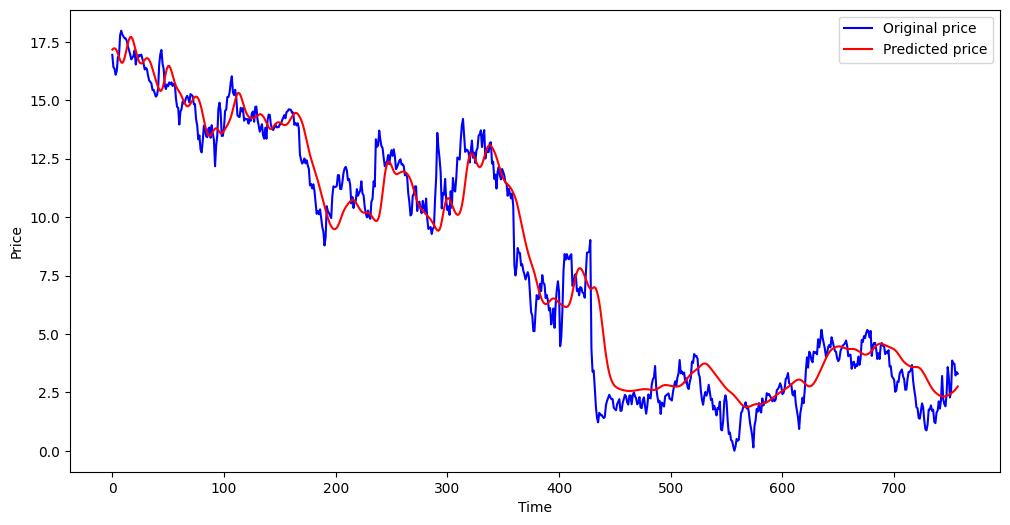

In [75]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label="Original price")
plt.plot(y_predicted,'r',label="Predicted price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()